###  Build a model to predict credit card defaults.

### Import Libraries

In [1]:
%load_ext tensorboard
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
print(tf.__version__)
import pandas as pd

2.0.0


Using TensorFlow backend.


### Import Data

In [3]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

credit_dataframe = pd.read_excel('default of credit card clients.xls', skiprows=1)

credit_dataframe = credit_dataframe.reindex(np.random.permutation(credit_dataframe.index))

In [4]:
# create a dataframe for independent variables
selected_features = credit_dataframe.drop(columns = ['ID','default payment next month'])
selected_features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7945,20000,2,2,1,37,0,0,2,0,0,...,19722,19616,19228,19878,3200,0,830,750,1000,282
16536,500000,1,2,2,26,0,0,0,0,0,...,129327,130136,127699,124623,6005,6005,6094,4161,5021,4350
26726,150000,1,1,2,26,-2,-1,0,0,-1,...,1401,2360,70,420,360,1041,1000,70,660,0
16333,60000,2,2,1,36,0,0,0,0,0,...,44291,41241,29534,29297,2000,3042,1433,1012,1029,1074
20629,220000,1,1,2,29,0,0,0,0,0,...,24998,23965,23865,23667,1410,1417,1333,731,1019,1045


In [5]:
# Dataframe for target variable
output_targets = pd.DataFrame(credit_dataframe, columns = ["default payment next month"])

In [6]:
# Check the rows and columns
selected_features.shape

(30000, 23)

In [7]:

# Choose the first 20000 examples for training.
training_examples = selected_features.head(20000)
training_targets = output_targets.head(20000)

# Normalize the training data
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose 10000 examples for validation.
validation_examples = selected_features.tail(10000)
validation_targets = output_targets.tail(10000)

# Normalize the validation data
scaler = StandardScaler().fit(validation_examples.values)
scaledf = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(scaledf, index=validation_examples.index, columns=validation_examples.columns)

training_examples.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7945,-1.1,0.8,0.2,-1.1,0.2,0.0,0.1,1.8,0.2,0.2,...,-0.4,-0.4,-0.3,-0.3,-0.1,-0.2,-0.2,-0.3,-0.2,-0.3
16536,2.6,-1.2,0.2,0.9,-1.0,0.0,0.1,0.1,0.2,0.2,...,1.2,1.3,1.4,1.4,0.0,-0.0,0.0,-0.0,0.0,-0.0
26726,-0.1,-1.2,-1.1,0.9,-1.0,-1.8,-0.7,0.1,0.2,-0.6,...,-0.7,-0.6,-0.7,-0.6,-0.3,-0.2,-0.2,-0.3,-0.3,-0.3
16333,-0.8,0.8,0.2,-1.1,0.1,0.0,0.1,0.1,0.2,0.2,...,-0.0,-0.0,-0.2,-0.2,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2
20629,0.4,-1.2,-1.1,0.9,-0.7,0.0,0.1,0.1,0.2,0.2,...,-0.3,-0.3,-0.3,-0.3,-0.2,-0.2,-0.2,-0.3,-0.2,-0.2
321,1.3,0.8,-1.1,0.9,-0.9,0.0,0.1,0.1,0.2,0.2,...,1.7,1.7,1.7,1.1,0.9,-0.0,-0.0,0.1,-0.1,2.5
9579,-0.9,-1.2,1.5,-1.1,1.6,0.0,0.1,0.1,1.9,0.2,...,0.3,-0.4,-0.4,-0.4,-0.2,-0.1,-0.3,-0.2,-0.2,-0.2
27004,-0.8,-1.2,-1.1,0.9,-0.5,0.0,0.1,0.1,0.2,-1.5,...,0.1,-0.7,-0.7,-0.6,-0.2,-0.1,-0.3,-0.3,-0.3,-0.3
2360,-1.1,0.8,0.2,-1.1,0.6,-0.9,1.8,-0.7,-0.7,0.2,...,-0.7,-0.5,-0.6,-0.6,-0.3,-0.2,0.2,-0.3,-0.3,-0.2
6593,-0.9,-1.2,0.2,0.9,2.2,0.0,0.1,0.1,0.2,0.2,...,0.0,0.0,-0.3,-0.3,-0.2,-0.2,-0.2,-0.3,-0.3,-0.3


In [8]:

# Check the baseline:
print("check the distribution of training target variable:")
frequency = training_targets['default payment next month'].value_counts(normalize =True)
print(frequency * 100)

print("check the distribution of validation target variable:")
frequency = validation_targets['default payment next month'].value_counts(normalize =True)
print(frequency * 100)

# Based on the majority classification, baseline is 77.9


check the distribution of training target variable:
0   77.7
1   22.3
Name: default payment next month, dtype: float64
check the distribution of validation target variable:
0   78.2
1   21.8
Name: default payment next month, dtype: float64


### Build model with 1 hidden layer

In [9]:

baseline_model = keras.Sequential([
    keras.layers.Dense(23, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)

  ])


baseline_model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                552       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________


### Fit Model

In [142]:
EPOCHS = 50
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 92us/sample - loss: 0.4822 - accuracy: 0.7992 - val_loss: 0.4622 - val_accuracy: 0.8088
Epoch 2/50
20000/20000 [==============================] - 1s 57us/sample - loss: 0.4477 - accuracy: 0.8173 - val_loss: 0.4516 - val_accuracy: 0.8142
Epoch 3/50
20000/20000 [==============================] - 1s 58us/sample - loss: 0.4394 - accuracy: 0.8195 - val_loss: 0.4497 - val_accuracy: 0.8144
Epoch 4/50
20000/20000 [==============================] - 1s 57us/sample - loss: 0.4345 - accuracy: 0.8196 - val_loss: 0.4470 - val_accuracy: 0.8130
Epoch 5/50
20000/20000 [==============================] - 1s 57us/sample - loss: 0.4308 - accuracy: 0.8204 - val_loss: 0.4507 - val_accuracy: 0.8148
Epoch 6/50
20000/20000 [==============================] - 1s 58us/sample - loss: 0.4285 - accuracy: 0.8220 - val_loss: 0.4452 - val_accuracy: 0.8160
Epoch 7/50
20000/20000 [==============================] 

#### Check the minimum and maximum accuracy 

In [143]:
print("Minimum accuracy of validation is: ", min(b_history.history['val_accuracy']))
print("Maximum accuracy of validation is: ", max(b_history.history['val_accuracy']))

Minimum accuracy of validation is:  0.8088
Maximum accuracy of validation is:  0.816


In [71]:
print("Minimum accuracy of model is: ", min(b_history.history['accuracy']))
print("Maximum accuracy of model is: ", max(b_history.history['accuracy']))

Minimum accuracy of model is:  0.80065
Maximum accuracy of model is:  0.82645


#### Precision, Recall and f1-score

In [72]:
from sklearn.metrics import classification_report
predictions = baseline_model.predict_classes(validation_examples)
print(classification_report(validation_targets,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7820
           1       0.60      0.41      0.48      2180

    accuracy                           0.81     10000
   macro avg       0.72      0.66      0.68     10000
weighted avg       0.79      0.81      0.80     10000



### Predictions

In [73]:
valpreds = baseline_model.predict_on_batch(validation_examples.iloc[1:10])
print(valpreds)

tf.Tensor(
[[0.24630249]
 [0.0858002 ]
 [0.09681055]
 [0.1895194 ]
 [0.28609657]
 [0.14166522]
 [0.57412684]
 [0.0760223 ]
 [0.21777438]], shape=(9, 1), dtype=float32)


In [74]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets.iloc[1:10])

       default payment next month
3751                            0
16669                           0
8268                            1
24820                           0
4358                            1
25164                           0
7968                            1
16265                           0
16749                           0


### Plot results

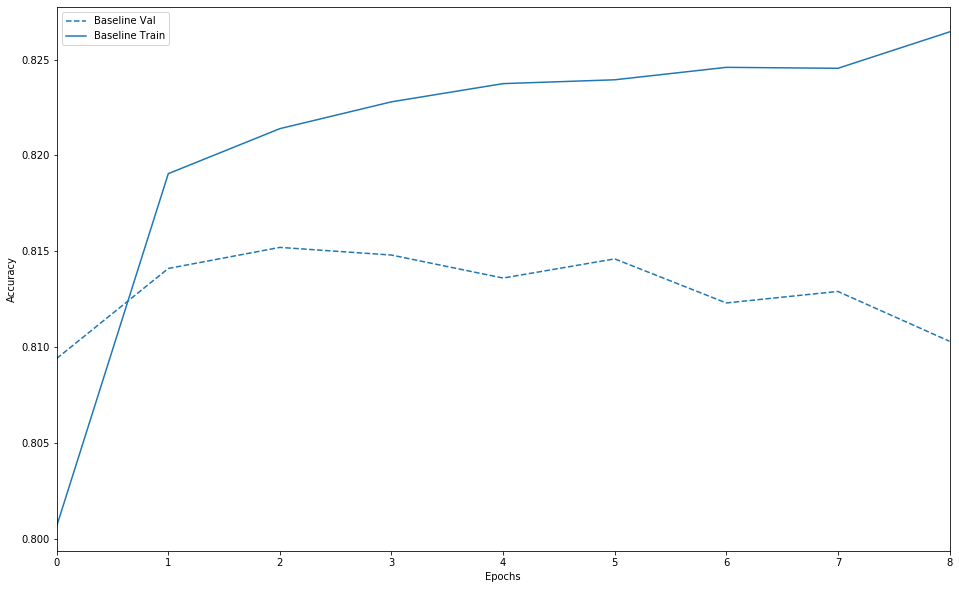

In [75]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  #plt.ylim([.7,.9])

plot_history([('baseline', b_history)])


### Build model with 2 hidden layer

In [76]:

baseline_model2 = keras.Sequential([
    keras.layers.Dense(24, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(15, activation=tf.nn.relu),
    keras.layers.Dense(15, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)

  ])


baseline_model2.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_52 (Dense)             (None, 15)                375       
_________________________________________________________________
dense_53 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 16        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [77]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history2 = baseline_model2.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 104us/sample - loss: 0.4813 - accuracy: 0.8045 - val_loss: 0.4625 - val_accuracy: 0.8091
Epoch 2/50
20000/20000 [==============================] - 1s 63us/sample - loss: 0.4460 - accuracy: 0.8201 - val_loss: 0.4520 - val_accuracy: 0.8120
Epoch 3/50
20000/20000 [==============================] - 1s 63us/sample - loss: 0.4388 - accuracy: 0.8217 - val_loss: 0.4516 - val_accuracy: 0.8142
Epoch 4/50
20000/20000 [==============================] - 1s 63us/sample - loss: 0.4349 - accuracy: 0.8228 - val_loss: 0.4506 - val_accuracy: 0.8149
Epoch 5/50
20000/20000 [==============================] - 1s 64us/sample - loss: 0.4329 - accuracy: 0.8228 - val_loss: 0.4484 - val_accuracy: 0.8158
Epoch 6/50
20000/20000 [==============================] - 1s 68us/sample - loss: 0.4298 - accuracy: 0.8241 - val_loss: 0.4506 - val_accuracy: 0.8115
Epoch 7/50
20000/20000 [==============================]

In [78]:
print("Minimum accuracy of validation is: ", min(b_history2.history['val_accuracy']))
print("Maximum accuracy of validation is: ", max(b_history2.history['val_accuracy']))

Minimum accuracy of validation is:  0.8091
Maximum accuracy of validation is:  0.8162


In [80]:
print("Minimum accuracy of model is: ", min(b_history2.history['accuracy']))
print("Maximum accuracy of model is: ", max(b_history2.history['accuracy']))

Minimum accuracy of model is:  0.8045
Maximum accuracy of model is:  0.8247


In [81]:
from sklearn.metrics import classification_report
predictions = baseline_model2.predict_classes(validation_examples)
print(classification_report(validation_targets,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7820
           1       0.63      0.36      0.46      2180

    accuracy                           0.81     10000
   macro avg       0.73      0.65      0.67     10000
weighted avg       0.79      0.81      0.79     10000



### Plot results of model with 1 hidden layer vs 2 hidden layers.

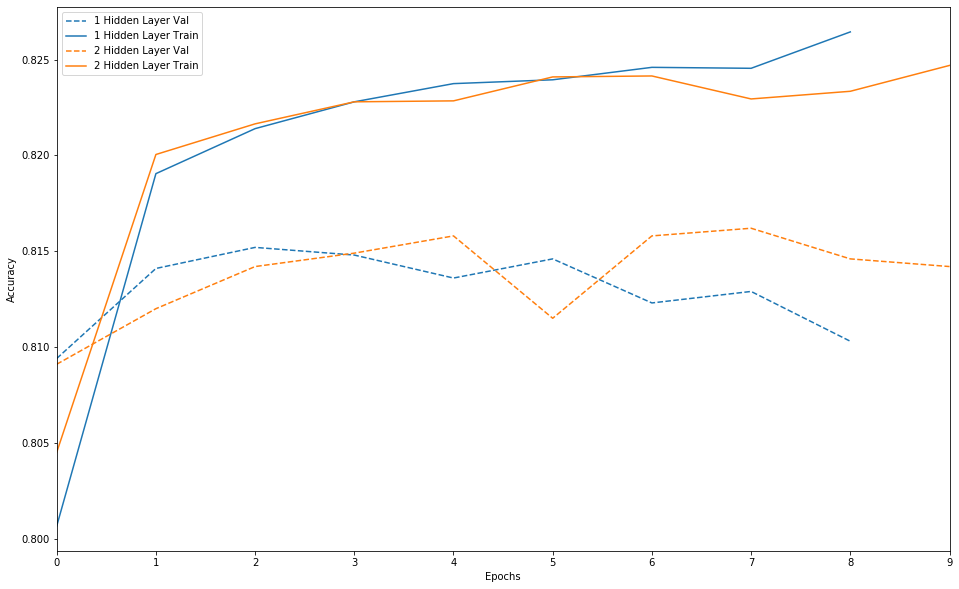

In [85]:
plot_history([('1 Hidden Layer', b_history), 
            ('2 Hidden Layer', b_history2) ])

###  2. b. (a) No of neurons in hidden layers is 2/3 the size of the input layer, plus the size of the output layer.

In [86]:

baseline_model3 = keras.Sequential([
    keras.layers.Dense(24, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(17, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)

  ])


baseline_model3.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_56 (Dense)             (None, 17)                425       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 18        
Total params: 1,043
Trainable params: 1,043
Non-trainable params: 0
_________________________________________________________________


In [87]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history3 = baseline_model3.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 102us/sample - loss: 0.4822 - accuracy: 0.8061 - val_loss: 0.4681 - val_accuracy: 0.8106
Epoch 2/50
20000/20000 [==============================] - 1s 58us/sample - loss: 0.4503 - accuracy: 0.8185 - val_loss: 0.4561 - val_accuracy: 0.8142
Epoch 3/50
20000/20000 [==============================] - 1s 59us/sample - loss: 0.4410 - accuracy: 0.8226 - val_loss: 0.4512 - val_accuracy: 0.8129
Epoch 4/50
20000/20000 [==============================] - 1s 59us/sample - loss: 0.4365 - accuracy: 0.8237 - val_loss: 0.4493 - val_accuracy: 0.8145
Epoch 5/50
20000/20000 [==============================] - 1s 58us/sample - loss: 0.4335 - accuracy: 0.8231 - val_loss: 0.4498 - val_accuracy: 0.8130
Epoch 6/50
20000/20000 [==============================] - 1s 59us/sample - loss: 0.4327 - accuracy: 0.8235 - val_loss: 0.4461 - val_accuracy: 0.8142
Epoch 7/50
20000/20000 [==============================]

In [88]:
print("Minimum accuracy of validation is: ", min(b_history3.history['val_accuracy']))
print("Maximum accuracy of validation is: ", max(b_history3.history['val_accuracy']))

Minimum accuracy of validation is:  0.8106
Maximum accuracy of validation is:  0.8145


### 2. b (b) No of neurons in hidden layers is twice the size of the input layer.

In [94]:

baseline_model4 = keras.Sequential([
    keras.layers.Dense(24, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(48, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)

  ])


baseline_model4.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model4.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_62 (Dense)             (None, 48)                1200      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 49        
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________


In [95]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history4 = baseline_model4.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 97us/sample - loss: 0.4869 - accuracy: 0.7972 - val_loss: 0.4626 - val_accuracy: 0.8106
Epoch 2/50
20000/20000 [==============================] - 1s 64us/sample - loss: 0.4478 - accuracy: 0.8200 - val_loss: 0.4543 - val_accuracy: 0.8143
Epoch 3/50
20000/20000 [==============================] - 1s 61us/sample - loss: 0.4388 - accuracy: 0.8227 - val_loss: 0.4472 - val_accuracy: 0.8137
Epoch 4/50
20000/20000 [==============================] - 1s 60us/sample - loss: 0.4339 - accuracy: 0.8239 - val_loss: 0.4452 - val_accuracy: 0.8150
Epoch 5/50
20000/20000 [==============================] - 1s 67us/sample - loss: 0.4306 - accuracy: 0.8243 - val_loss: 0.4461 - val_accuracy: 0.8137
Epoch 6/50
20000/20000 [==============================] - 1s 66us/sample - loss: 0.4288 - accuracy: 0.8252 - val_loss: 0.4487 - val_accuracy: 0.8140
Epoch 7/50
20000/20000 [==============================] 

In [96]:
print("Minimum accuracy of validation is: ", min(b_history4.history['val_accuracy']))
print("Maximum accuracy of validation is: ", max(b_history4.history['val_accuracy']))

Minimum accuracy of validation is:  0.8106
Maximum accuracy of validation is:  0.8156


### Plot results of model with No of neurons in hidden layers is 2/3 the size of the input layer vs twice the input layer.

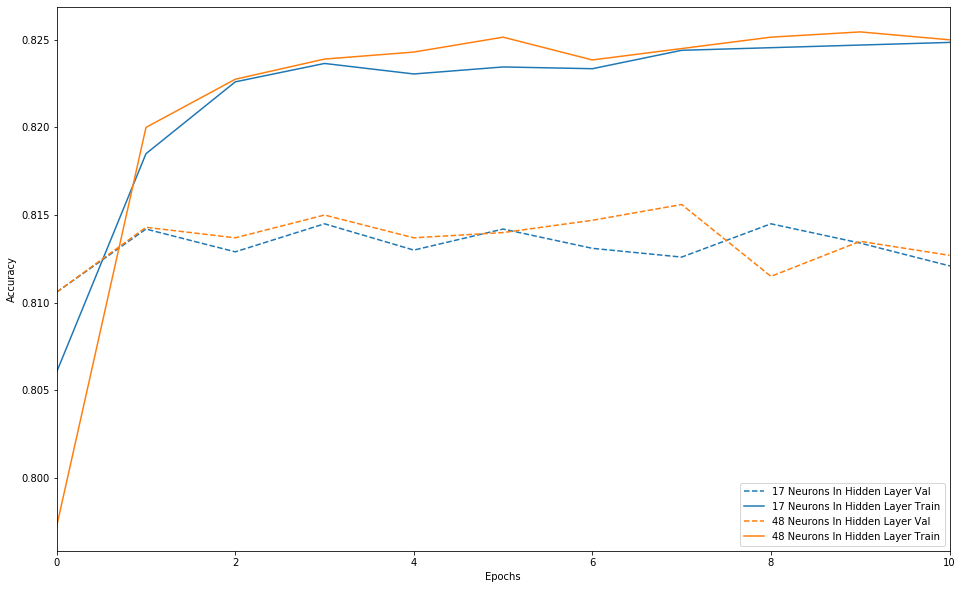

In [98]:
plot_history([('17 Neurons in hidden layer', b_history3), #  model with hidden layer neurons 2/3 of input layer 
            ('48 Neurons in hidden layer', b_history4)]) # model with hidden layer neurons twice the input layer

### Regularization

In [108]:
l1_model = keras.Sequential([
    keras.layers.Dense(24, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])

l1_model.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])


In [109]:
l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 3s 141us/sample - loss: 2.9512 - accuracy: 0.7706 - val_loss: 0.5629 - val_accuracy: 0.7820
Epoch 2/50
20000/20000 [==============================] - 2s 89us/sample - loss: 0.5703 - accuracy: 0.7772 - val_loss: 0.5616 - val_accuracy: 0.7820
Epoch 3/50
20000/20000 [==============================] - 2s 95us/sample - loss: 0.5701 - accuracy: 0.7772 - val_loss: 0.5632 - val_accuracy: 0.7820
Epoch 4/50
20000/20000 [==============================] - 2s 86us/sample - loss: 0.5692 - accuracy: 0.7772 - val_loss: 0.5618 - val_accuracy: 0.7820
Epoch 5/50
20000/20000 [==============================] - 2s 88us/sample - loss: 0.5699 - accuracy: 0.7772 - val_loss: 0.5627 - val_accuracy: 0.7820


### Plot regularization results

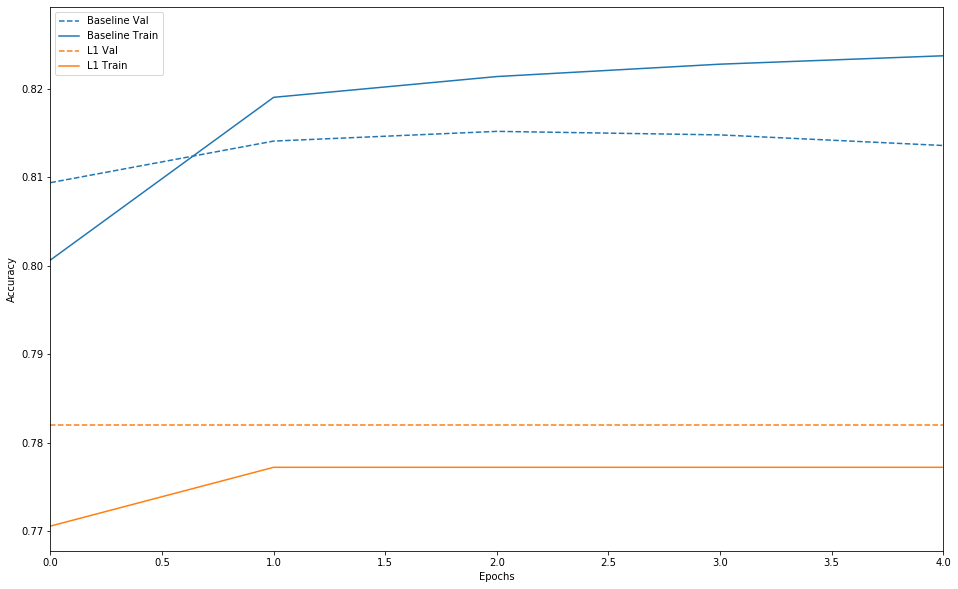

In [110]:
plot_history([('baseline', b_history),  # no regularization model
              ('L1', l1_history)])

### d.	Activation function - ReLU and your choice

In [145]:
baseline_model5 = keras.Sequential([
    keras.layers.Dense(24, activation=tf.nn.tanh,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(20, activation=tf.nn.tanh),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)

  ])


baseline_model5.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
baseline_model5.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                500       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 21        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [146]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history5 = baseline_model5.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=1,
                    callbacks=[early_stopping_monitor])

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 2s 85us/sample - loss: 0.4786 - accuracy: 0.7968 - val_loss: 0.4554 - val_accuracy: 0.8070
Epoch 2/50
20000/20000 [==============================] - 1s 56us/sample - loss: 0.4398 - accuracy: 0.8178 - val_loss: 0.4472 - val_accuracy: 0.8119
Epoch 3/50
20000/20000 [==============================] - 1s 56us/sample - loss: 0.4345 - accuracy: 0.8200 - val_loss: 0.4438 - val_accuracy: 0.8128
Epoch 4/50
20000/20000 [==============================] - 1s 56us/sample - loss: 0.4302 - accuracy: 0.8226 - val_loss: 0.4415 - val_accuracy: 0.8137
Epoch 5/50
20000/20000 [==============================] - 1s 58us/sample - loss: 0.4275 - accuracy: 0.8219 - val_loss: 0.4415 - val_accuracy: 0.8147
Epoch 6/50
20000/20000 [==============================] - 1s 56us/sample - loss: 0.4255 - accuracy: 0.8227 - val_loss: 0.4414 - val_accuracy: 0.8143
Epoch 7/50
20000/20000 [==============================] 

In [150]:
print("Minimum accuracy of validation is: ", min(b_history5.history['val_accuracy']))
print("Maximum accuracy of validation is: ", max(b_history5.history['val_accuracy']))

Minimum accuracy of validation is:  0.807
Maximum accuracy of validation is:  0.8147


In [149]:
print("Minimum accuracy of model is: ", min(b_history5.history['accuracy']))
print("Maximum accuracy of model is: ", max(b_history5.history['accuracy']))

Minimum accuracy of model is:  0.79675
Maximum accuracy of model is:  0.82535


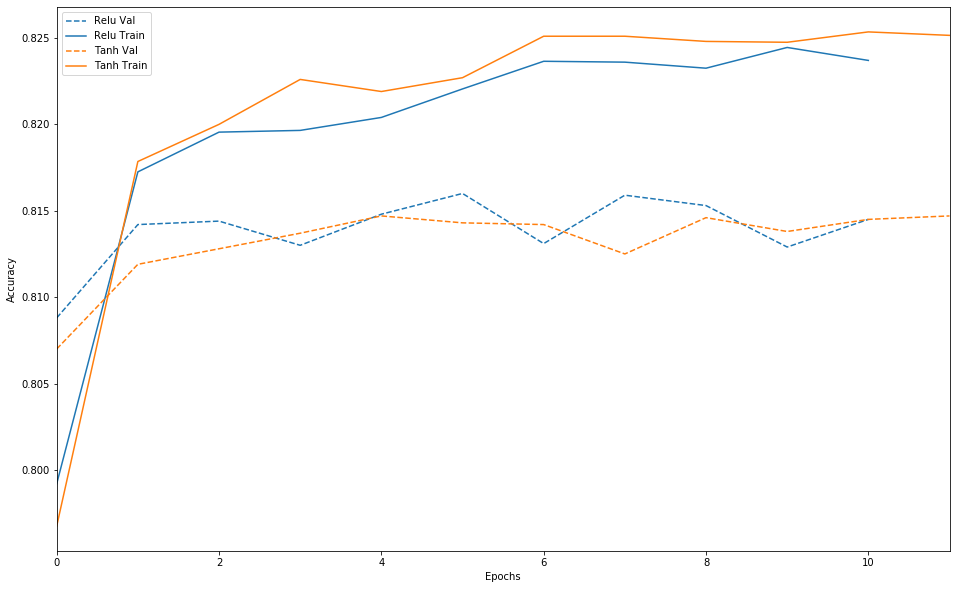

In [151]:
plot_history([('ReLU', b_history),  # ReLU activation function
              ('tanh', b_history5)])  # model with tanh 

##### 3. Discuss the results of your comparison and provide an explanation of the results (What is the purpose of the hyperparameter, why did one value do better than the other?

a. 1 Hidden Layer vs 2 Hidden Layers:

The number of hidden layers is related to model capacity. If we increase the number of layers, the model has more capacity and is able to learn more complex functions and thus results in better performance. In this model, we see that the model with 2 hidden layers is performing slightly better than model with 1 hidden layer. The generalization error is less in model with 2 hidden layer. It is better to add more layers to the model than adding more neurons to one existing layer as deeper networks are a more efficient way of utilizing model capacity. Wide networks are very good at memorization, but not so good at generalization. On the other hand, deeper networks are good at generalization and more complex functions can be learned.

b.	No of neurons in hidden layers between (a)2/3 the size of the input layer, plus the size of the output layer, and (b) twice the size of the input layer:

Too few neurons in hidden layers may result in underfitting while having too many neurons may result in overfitting. In this model, number of neurons in hidden layers with twice the size of the input layer is giving better results and accuracy than number of neurons with 2/3 the size of the input layer. Because by increasing the number of neurons we are increasing the capacity of the model resulting in a better performance. However, increasing it furthur might result in overfitting of the model so we need to have the right number of neurons for a model to learn the phenomena.


c.	Regularization:

Regularization is a technique used in neural networks to reduce the generalization gap. It overcomes the issue of overfitting. When the capacity of a model is increased to reduce the training error, there is a possibility of model memorizing the data points which basically results in model performing very well on training data but gives poor performance on new data or validation data. This issue can be resolved using regularization. In this model, I have used L1 which performs the feature selection and overcomes the issue of overfitting and generaization error. 

d.	Activation function - ReLU and your choice:

The model above named 'baseline_model' is built using ReLU and another model 'baseline_model5' is built using tanh activation function. ReLU is performing better than tanh in terms of accuracy and generalization. ReLU builds more sparse model i.e. neurons are removed if they are not contributing to the model's predictive power. 'baseline_model' uses ReLU in input and hidden layers and sigmoid function for output layer. ReLu is less computationally expensive than tanh because it involves simpler mathematical operations and sigmoid function is used in the output layer for binary classification. 

'baseline_model5' uses tanh in input and hidden layers and sigmoid as output function. We cannot use tanh as output function for binary classification because its range is (-1,1). tanh is better at handling negative values. But, it is computationally more expensive than ReLU.

#### Conclusion: 

The output type of this model is binary so the activation function used here is 'sigmoid', loss function is 'binary_crossentropy', optimizer is 'rmsprop' and metric used is 'accuracy'. This is a case of imbalanced binary classification model which is why we also need to check other metrics such as f1 score and recall to evaluate our model. The minimum validation accuracy of this model is 81% and is exceeding baseline accuracy (77.7%). It is also performing well on f1 score, precision and recall.